<h2>ALGORITHMS AND DATA STRUCUTURES - Part II<br>
Final Project</h2>
<h3>March, 2023</h3>

---
<a id='assignment'> </a>
> ASSIGNMENT:
---

You are tasked with developing a movie recommendation system. You are given a list of movies (their names) and a list of similarities between movies (pairs of movies that are similar). You are also given a list of user's friends and for each friend a list of movies that he has already seen.

Your system should recommend one movie with the highest discussability and uniqueness. Discussability is the number of friends of user, who have already seen that movie. Uniqueness is 1 divided by the mean number of similar movies that the user's friends have already seen. So you should return the film with the highest number: F / S, where F = number of friends who have seen this movie, and S = mean of the number of similar movies seen for each friend. Exclude the movies with S = 0.

If (a, b) and (b, c) are pairs of similar movies, then (a, c) is a pair of similar movies too. Each movie is not counted in its Uniqueness.

Input example. Basically it is up to you to come up with data structure you like or you think easy to work with. In a nutshell you have as an input these parameters (they can be in form of a list/dict etc):
<code>
<p>movies = ["Parasite","1917","Ford v Ferrari","Jojo Rabbit","Joker"]</p>
<p>similarities = [["Parasite", "1917"],<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;["Parasite", "Jojo Rabbit"],<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;["Joker", "Ford v Ferrari"]]</p>
<p>friends = [["Joker"],<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;["Joker","1917"], <br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;["Joker"], <br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;["Parasite"], <br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;["1917"], <br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;["Jojo Rabbit", "Joker"]]</p>
</code>

<a id='solution_outline'></a>

---
> SOLUTION OUTLINE:

---

<p><u>Step-by-step description:</u>

1. The list of movie similarities was placed into a graph basing on similarity pairs.

2. The graph was scanned for connected components of similar movies as simple movie pair-wise matching does not allow to directly connect movies which were never paired.

3. The number of watches per movie was counted through iteration over the list of friends.

4. The number of watches per connected component was counted through iteration over component elements obtained at step 2.

5. Movie uniqueness was calculated through iteration over connected component elements using ratio F/S for each movie, where 
<li>F = number of watches of the movie, </li>
<li>S = (number of watches of this connected component - number of watches of the movie)/number of friends</li>
||| According to the assignment conditions, movies with ratio equal to 0 or undefined ratio are excluded at this step.

6. The list of movie uniqueness ratios obtained at step 5 was procecced to ouput the movie with the highest rating or a list of movies if there is more than one having the same maximum rating.
</p>
<p><u>Data structires and algorithms used:</u>

* Movies are stored in a graph with edges representing their similarities. The graph was implemented as a dictionary following the idea from the article at https://www.python.org/doc/essays/graphs/. Meanwhile, for the test reference solution given further an adjacency matrix graph representation was chosen.

* In order to search the graph for connected components the depth-first search (DFS) algorithm was applied.</p>

<p>For each step of the approach described above a separate function was implemented . Additionally for DFS algorithm employed at step 2 a recursive helper function was implemented.</p>

---
<a id='solution_functions'></a>
> SOLUTION FUNCTIONS:
---

* Step 1

In [1]:
def graph_composition(similarities):
    """
    Constructs a graph from a list of movie similarity pairs.
    Each movie is represented as a node in the graph, and 
    two movies are connected by an edge if they are similar 
    to each other.
    
    Args:
    - similarities (List[List[str]]): A list of movie similarity 
        pairs where each pair is represented as a list of two 
        strings representing the movie titles.
    
    Returns:
    - dict: A dictionary where each key is a movie title and the
        corresponding value is a set of similar movies.
    """
    graph = {}

    for pair in similarities:
        if len(pair) == 2:
            graph.setdefault(pair[0], set()).add(pair[1])
            graph.setdefault(pair[1], set()).add(pair[0])
        
    return graph


* Step 2

In [2]:
def connected_components(graph):
    """
    Finds the connected components of a graph using depth-first search.
    Each component is represented as a list of nodes in the graph.
    
    Args:
    - graph (dict): A dictionary representing a graph where each key 
        is a node and the corresponding value is a set of connected nodes.
    
    Returns:
    - List[List[str]]: A list of connected components, where each 
        component is represented as a list of node labels (movie titles).
    """
    components = []
    visited = set()

    for node in graph:
        if node not in visited:
            component = set()
            dfs(node, graph, visited, component)
            components.append(list(component))

    return components


def dfs(node, graph, visited, component):
    """
    Helper function for connected_components. Performs depth-first search
    to find all nodes connected to a given node in the graph.
    
    Args:
    - node (str): The node to start the search from.
    - graph (dict): A dictionary representing a graph where each key 
        is a node and the corresponding value is a set of connected nodes.
    - visited (set): A set of nodes that have already been visited.
    - component (set): A set of nodes in the current component.
    """
    visited.add(node)
    component.add(node)

    for neighbor in graph[node]:
        if neighbor not in visited:
            dfs(neighbor, graph, visited, component)

* Step 3

In [3]:
def movie_watches_count(movies, friends):
    """
    Counts the number of times each movie was watched by a friend.

    Args:
    - movies (list): A list of strings representing movie names.
    - friends (list): A list of lists representing the movies watched 
        by each friend.

    Returns:
    - list: A list of integers representing the number of times each 
        movie was watched.
    """
    watches_per_movie = [0] * len(movies)
    for friend_watches in friends:
        for movie in friend_watches:
            idx = movies.index(movie)
            watches_per_movie[idx] += 1

    return watches_per_movie


* Step 4

In [4]:
def components_watches_count(movies, components, watches_per_movie):
    """
    Counts the number of times each movie was watched by friends in each 
    connected component.

    Args:
    - movies (list): A list of strings representing movie names.
    - components (list): A list of lists representing the connected 
        components in the graph.
    - watches_per_movie (list): A list of integers representing the 
        number of times each movie was watched by friends.

    Returns:
    - list: A list of integers representing the number of times each 
        movie was watched by friends in each connected component.
    """
    watches_per_component = [0] * len(components)
    for i, component in enumerate(components):
        for movie in component:
            idx = movies.index(movie)
            watches_per_component[i] += watches_per_movie[idx]
            
    return watches_per_component

* Step 5

In [5]:
def movie_rating_calculation(movies, 
                             friends, 
                             components, 
                             watches_per_movie, 
                             watches_per_component):
    """
    Calculates the rating for each movie in each connected component.

    Args:
    - movies (list): A list of strings representing movie names.
    - friends (list): A list of strings representing friend names.
    - components (list): List of lists, where each list contains the movies 
        in a connected component.
    - watches_per_movie (list): List containing the number of watches 
        for each movie.
    - watches_per_component (list): List containing the number of watches 
        for each connected component.

    Returns:
    - list: List of lists, where each list contains a movie and its rating.
    """
    movie_ratings = []
    friends_count = len(friends)
    for i, component in enumerate(components):
        component_watches = watches_per_component[i]
        for movie in component:
            idx = movies.index(movie)
            movie_watches = watches_per_movie[idx]
            if component_watches != movie_watches and movie_watches != 0:
                rating = friends_count * movie_watches / (component_watches - movie_watches)
                movie_ratings.append([rating, movie])
    movie_ratings = sorted(movie_ratings, key=lambda x: (-x[0], x[1]))
    
    return movie_ratings


* Step 6

In [6]:
def output_preparation(movie_ratings):
    """
    Prepares the output string with the top rated movie(s).

    Args:
    - movie_ratings (list): List of lists, where each list contains 
        a movie and its rating.

    Returns:
    - str: String containing the top rated movie(s).

    """
    if not movie_ratings:
        rating_ouput = "No movies rated above 0"
    else:
        highest_rating = movie_ratings[0][0]
        top_movies = [movie[1] for movie in movie_ratings if movie[0] == highest_rating]
        if len(top_movies) > 1:
            rating_ouput = "The top rated movies are:"
            for movie in top_movies:
                rating_ouput += "\n- " + movie
        else:
            rating_ouput = "The top rated movie is: " + top_movies[0]
    
    return rating_ouput

---
<a id='solution_running'></a>
> SOLUTION RUNNING:
---

<li> Test input from the assignment

In [7]:
movies = ["Parasite","1917","Ford v Ferrari","Jojo Rabbit","Joker"]
similarities = [["Parasite", "1917"],
                ["Parasite", "Jojo Rabbit"],
                ["Joker", "Ford v Ferrari"]]
friends = [["Joker"],
           ["Joker","1917"],
           ["Joker"],
           ["Parasite"],
           ["1917"],
           ["Jojo Rabbit", "Joker"]]

<li> Functions ruuning the solution

In [8]:
def movie_uniqueness(movies, 
                     similarities, 
                     friends, 
                     debug_print=True):
    """
    Calculates the uniqueness rating for each movie in the dataset based on the number of times 
    it has been watched by the user's friends, the similarity of the movie to other movies in the dataset,
    and the number of friends who have watched the same movies. 

    Args:
    - movies (list): A list of strings representing movie names.
    - similarities (list): A list of lists with pairs of similar movies.
    - friends (list): A list of lists representing the titles of movies watched by the user's friends.
    - debug_print (bool): A boolean variable indicating whether or not to print debugging information.

    Returns:
    - list: A list of lists representing the movies in descending order of their uniqueness rating.

    The function works as follows:
    - The similarities dictionary is used to construct a graph where the movies are the nodes and
      the similarity scores are the edge weights.
    - The graph is then partitioned into connected components.
    - The number of watches for each movie is calculated based on the number of friends who have 
        watched that movie.
    - The number of watches for each connected component is also calculated.
    - Using these numbers, a uniqueness rating is calculated for each movie in each connected component. 
        The final list of movies is sorted in descending order of their uniqueness rating.

    The function also prints out the following information for debugging purposes:
    - The graph representation of the dataset.
    - The list of connected components.
    - The number of watches for each movie.
    - The number of watches for each connected component.
    - The uniqueness rating for each movie.
    """
    graph = graph_composition(similarities)
    components = connected_components(graph)
    watches_per_movie = movie_watches_count(movies, friends)
    watches_per_component = components_watches_count(movies, 
                                                    components, 
                                                    watches_per_movie)
    movie_ratings = movie_rating_calculation(movies, 
                                            friends,
                                            components, 
                                            watches_per_movie, 
                                            watches_per_component)
    if debug_print:
        print('graph:')
        for node in graph.items(): print(node)
        print()
        print(f'components: {components}')
        print(f'watches_per_movie: {watches_per_movie}')
        print(f'watches_per_component: {watches_per_component}')
        print(f'movie_ratings: {movie_ratings}')

    return movie_ratings

In [9]:
movie_ratings = movie_uniqueness(movies, similarities, friends)
output_preparation(movie_ratings)

graph:
('Parasite', {'1917', 'Jojo Rabbit'})
('1917', {'Parasite'})
('Jojo Rabbit', {'Parasite'})
('Joker', {'Ford v Ferrari'})
('Ford v Ferrari', {'Joker'})

components: [['1917', 'Jojo Rabbit', 'Parasite'], ['Joker', 'Ford v Ferrari']]
watches_per_movie: [1, 2, 0, 1, 4]
watches_per_component: [4, 4]
movie_ratings: [[6.0, '1917'], [2.0, 'Jojo Rabbit'], [2.0, 'Parasite']]


'The top rated movie is: 1917'

---
<a id='proof'></a>
> PROOF OF OUTPUT CORRECTNESS:
---

In order to check the solution correctness manual calculation of each movie ratio is given below.

movie title | [1] movie watches | [2] component watches | [3] number of friends | ratio = [1]*[3]/([2]-[1])
-|-|-|-|-
Parasite | 1 | 4 | 6 | 1 * 6 / (4 - 1) = 6 / 3 = 2.0
1917 | 2| 4 | 6 | 2 * 6 / (4 - 2) = 12 / 2 = 6.0
Ford v Ferrari | 0 | 4 | 6 | 0 * 6 / (4 - 0) = 0 / 4 = 0 (excluded)
Jojo Rabbit | 1 | 4 | 6 | 1 * 6 / (4 - 1) = 6 / 3 = 2.0
Joker | 4 | 4 | 6 | 4 * 6 / (4 - 4) = 24 / 0 = division by 0 (excluded)

It can be seen that all manually calculated ratios coincide with the ratios calculated programmatically and the top rated movie output of the solution is correct for the given test input: "1917".

---
> TEST SECTION:
---

In [255]:
from random import seed, randint
from time import time
from IPython.display import clear_output as clear
from itertools import chain
from sys import getsizeof
from math import log
import networkx as nw
import matplotlib.pyplot as plt


<li> Importing a dataset from a file

In [346]:
movies_dataset = []
with open("movies.txt", encoding='utf-8') as file:
    for line in file:
        movies_dataset.append(line.strip())

len(movies_dataset)

41950

<li> Reference Solution
<br>
<p>The reference solution is implemented the following way:

1. Movie similarities loaded into a graph object of imported module 'networkx'.

2. Connected components obtained by iteration of networkx connected_components generator.
3. Watches per movie counted by iteration over movie titles in friend watches dataset with the help of chain.from_iterable() method imported from module 'itertools'.
4. Basing on contents of connected components an adjacency matrix composed, which has weighed edges. The weight of each edge represents the number of watches for the movie it is connecting to. Zero weights are represented by extremely small numbers in order not to lose connection. All diagonal elements are equal to 0, therefore a rounded sum of any matrix line is equal to the number of movie watches in the component excluding the number of watches for the movie corresponding to this line of the matrix.
5. Movie ratings calculated trough iteration over the adjacency matrix.</p>

In [ ]:
def adjacency_matrix_composition(test_movies, test_components, watches_per_movie):
    """
    Creates an adjacency matrix representing the similarity between movies in 
    each connected component. Each edge has weight equal to the number of 
    watches of the movie it is connecting to.

    Args:
    - test_movies (list): List of strings representing movie names.
    - test_components (list): List of lists, where each list contains the movies 
        in a connected component.
    - watches_per_movie (list): List containing the number of watches 
        for each movie.

    Returns:
    - list: A square matrix where each element represents the similarity 
        between two movies. The matrix is symmetric along the diagonal.

    """
    movie_count = len(test_movies)
    adj_matrix = [[0] * movie_count for _ in range(movie_count)]
    
    for component in test_components:
        component_movie_count = len(component)
        for i in range(component_movie_count):
            for j in range(i + 1, component_movie_count):
                idx1 = test_movies.index(component[i])
                idx2 = test_movies.index(component[j])
                adj_matrix[idx1][idx2] = watches_per_movie[idx2] if watches_per_movie[idx2] != 0 else 1e-100
                adj_matrix[idx2][idx1] = watches_per_movie[idx1] if watches_per_movie[idx1] != 0 else 1e-100

    return adj_matrix


In [348]:
def test_friends_processing(test_movies, test_friends):
    """
    Processes the test data to calculate the number of watches for each movie and the number 
    of friends in the dataset.

    Args:
    - test_movies (list): A list of strings representing movie names.
    - test_friends (list): A list of lists representing the titles of movies watched by the user's friends.

    Returns:
    - tuple: A tuple containing two elements:
        - A list of integers representing the number of watches for each movie.
        - An integer representing the number of friends in the dataset.

    """
    watches_per_movie = [0] * len(test_movies)
    for movie in chain.from_iterable(test_friends):
        watches_per_movie[test_movies.index(movie)] += 1

    return watches_per_movie, len(test_friends)

In [349]:
def movie_rating_calculation_am(test_movies, adj_matrix, watches_per_movie, friends_count):
    """
    Calculates the rating for each movie based on the adjacency matrix.

    Args:
    - test_movies (list): A list of movie titles
    - adj_matrix (list): A 2D list representing the adjacency matrix of the 
        movie graph.
    - watches_per_movie (list): A list containing the number of watches 
        for each movie.
    - friends_count (int): Number of friends.

    Returns:
    - list: A list of lists representing the movies in descending order of their 
        uniqueness rating.
    
    """
    movie_ratings = []

    for movie in range(len(adj_matrix)):
        component_watches = round(sum(adj_matrix[movie]))
        if component_watches != 0 and watches_per_movie[movie] != 0:
            movie_ratings.append(
                [friends_count * watches_per_movie[movie] / component_watches, test_movies[movie]]) 
    movie_ratings = sorted(movie_ratings, key=lambda x: (-x[0], x[1]))
    return movie_ratings


In [350]:
def reference_solution(test_movies, test_similarities, test_friends, debug_print=True):
    """
    Computes the movie ratings based on the test dataset, which includes movies, their similarities, 
    and a list of friends with the movies they have watched.

    Args:
    - test_movies (list): A list of strings representing the names of movies in the dataset.
    - test_similarities (list): A list of movie similarity paire.
    - test_friends (list): A list of lists representing the titles of movies watched by the user's friends.
    - debug_print (bool): If True, prints out debugging information.

    Returns:
    - list: A list of lists representing the movies in descending order of their rating.

    The function works as follows:
    - A graph is constructed from the similarity dictionary, where the movies are the nodes and
      the similarities are the edges.
    - The graph is partitioned into connected components.
    - The number of watches for each movie is calculated based on the number of friends who have 
        watched that movie.
    - The adjacency matrix is computed based on the connected components and the number of watches 
        for each movie.
    - Using the adjacency matrix and the number of friends, the rating for each movie is calculated. 
        The final list of movies is sorted in descending order of their rating.

    If debug_print is True, the following information is printed for debugging purposes:
    - The graph representation of the dataset.
    - The list of connected components.
    - The number of watches for each movie.
    - The adjacency matrix.
    - The rating for each movie.
    """

    graph_similarities = nw.Graph()
    graph_similarities.add_edges_from(test_similarities)
    test_components = [list(component) for component in nw.connected_components(graph_similarities)]
    watches_per_movie, friends_count = test_friends_processing(test_movies, test_friends)
    adj_matrix = adjacency_matrix_composition(test_movies, test_components, watches_per_movie)
    movie_ratings = movie_rating_calculation_am(test_movies, adj_matrix, watches_per_movie, friends_count)
    
    if debug_print:
        print('graph_similarities:')
        for node in graph_similarities: print(node)
        print()
        print(f'test_components: {test_components}')
        print(f'watches_per_movie: {watches_per_movie}')
        print(f'adjacency matrix: \n{adj_matrix}')
        print(f'movie_ratings: {movie_ratings}')

    return movie_ratings

<li> Main Test Function 

In [351]:
def test_movie_rating_calculation(test_movies, test_similarities, test_friends, correct_answer):
    """
    Test function for the movie_uniqueness function. Calls the movie_uniqueness function with the 
    given test input, and compares the returned output to the expected correct answer.

    Args:
    - test_movies (list): A list of strings representing movie names.
    - test_similarities (list): A list of movie similarity pairs.
    - test_friends (list): A list of lists representing the titles of movies watched by 
        the user's friends.
    - correct_answer (list): A list of lists representing the expected output of 
        the movie_uniqueness function.

    Raises:
    - AssertionError: If the returned output from movie_uniqueness does not match 
        the expected correct answer.

    Returns:
    - None: This function does not return anything, but raises an AssertionError if the test fails.

    """
    movie_ratings = movie_uniqueness(test_movies, test_similarities, test_friends, debug_print=False)
    error_str = '>>> Test FAILED:\nInput: {0}\nOutput: {1}\nCorrect output: {2}'
    assert movie_ratings == correct_answer, error_str.format((test_movies, test_similarities, test_friends), 
                                                              movie_ratings, 
                                                              correct_answer)

In [390]:
# Progress bar auxiliary function

def progress_bar(current, end, progress=0, start=0):
    progress_next = round((current-start)/end*100)
    if current == end - 1: progress_next = 100
    if progress_next > progress:
        clear()
        progress_half = progress_next // 2
        progress_string = '  ' + str(progress_next) + '% '
        if progress_next <= 50:
            left_progress, left_space = progress_half, 25 - progress_half
            right_progress, right_space = 0, 25
        else:
            left_progress, left_space = 25, 0
            right_progress, right_space = progress_half - 25, 50 - progress_half
        print('[', '#' * left_progress, ' ' * left_space, progress_string[-6:], 
                '#' * right_progress, ' ' * right_space, ']', sep='')
        progress = progress_next
    return progress

<li> Random Test Generators

In [356]:
def get_random_test_similarities(right_border):
    """
    Generates a random list of lists (pairs) representing similarities between movies.
    
    Args:
    - right_border (int): An integer specifying the maximum number of movies in the dataset.
    
    Returns:
    - list: A list of lists where each nested list represents a pair of movie names.
    """
    test_similarities = []
    for m in range(randint(0, right_border)):
        test_similarities.append([movies_dataset[randint(0, right_border - 1)], 
                                  movies_dataset[randint(0, right_border - 1)]])
    return test_similarities


def get_random_test_friends(right_border):
    """
    Generates a random list of lists representing the movies watched by friends of the user.
    
    Args:
    - right_border (int): An integer specifying the maximum number of movies in the dataset 
        and the maximum number of friebds.
    
    Returns:
    - list: A list of lists where each sublist represents the movies watched by a friend of the user.
    """
    test_friends = []
    for m in range(randint(0, right_border)):
        friend_watches = []
        for n in range(randint(0, right_border)):
            friend_watches.append(movies_dataset[randint(0, right_border - 1)])
        test_friends.append(friend_watches)
    return test_friends

<li> Stress Test Function

In [370]:
def run_stress_test(max_right_border=100):
    """
    Runs a stress test on the movie_uniqueness function using randomly generated input data.

    Args:
    - max_right_border (int): the maximum number of movies to generate for each iteration of the test

    Returns:
    - None

    This function generates random input data for the movie_uniqueness function and checks if 
    the output of the function matches the output of the reference_solution function. The test is 
    run for movie datasets of increasing size, starting from 10 movies and up to a maximum number 
    of movies specified by max_right_border. If all tests pass, the function prints 
    'Stress tests passed successfully' to the console. 
    """
    seed(100)
    progress = 0   
    for right_border in range(10, max_right_border):
        progress = progress_bar(right_border, max_right_border, progress)
        test_similarities = get_random_test_similarities(right_border)
        test_friends = get_random_test_friends(right_border) 
        test_movie_rating_calculation(movies_dataset[:max_right_border], 
                                      test_similarities, 
                                      test_friends, 
                                      reference_solution(movies_dataset[:right_border], 
                                                         test_similarities, 
                                                         test_friends, 
                                                         debug_print=False))
    print('Stress tests passed successfully')

In [371]:
# Running the stress tests for 1000 movies

run_stress_test(max_right_border=1000)

[######################### 100% #########################]
Stress tests passed successfully


---
> TIME AND SPACE COMPLEXITY
---

* Step 1. The list of movie similarities placed into a graph basing on similarity pairs.

In [360]:
# def graph_composition(similarities):
    
#     graph = {}

#     for pair in similarities:
#         if len(pair) == 2:
#             graph.setdefault(pair[0], set()).add(pair[1])
#             graph.setdefault(pair[1], set()).add(pair[0])

#     return graph

TIME COMPLEXITY: 

Generally, it is $O(s)$, where $s$ is the number of similarity pairs, i.e. number of edges of the graph, which we are composing. Hypothetically, if all movies are similar to each other and each similarity is represented by a direct edge, the number of edges $s$ amounts to $m*(m-1)$, where $m$ is the number of movies in the dataset (vertices of the graph). In that case time complexity approaches $O(m^2)$.

SPACE COMPLEXITY: 

Again, in general it is $O(s)$. However, in the worst case described above when $s$ is equal to $m*(m-1)$, $O(s)$ approaches $O(m^2)$.

* Step 2. The graph scanned for connected components of similar movies as simple movie pair-wise matching does not allow to directly connect movies which were never paired.

In [361]:
# def connected_components(graph):

#     components = []
#     visited = set()

#     for node in graph:
#         if node not in visited:
#             component = set()
#             dfs(node, graph, visited, component)
#             components.append(list(component))

#     return components

# ------------------------------------------------------------

# def dfs(node, graph, visited, component):

#     visited.add(node)
#     component.add(node)

#     for neighbor in graph[node]:
#         if neighbor not in visited:
#             dfs(neighbor, graph, visited, component)

TIME COMPLEXITY: The DFS algorithm has time complexity $O(E)$, where $E$ is the number of edges of the graph. Having denoted the number of edges as $s$ we arrive at time complexity $O(s)$, which in the worst case approaches $O(m^2)$, where m is the number of movies in the dataset.

SPACE COMPLEXITY: As every movie is represented in the list of connected components (component variable) only once, space complexity does not exceed $O(m)$, where m is the number of movies in the dataset. Other parts of the code do not increase the space complexity.

* Step 3. The number of watches per movie was counted through iteration over the list of friends.

In [372]:
# def movie_watches_count(movies, friends):

#     watches_per_movie = [0] * len(movies)

#     for friend_watches in friends:
#         for movie in friend_watches:
#             idx = movies.index(movie)
#             watches_per_movie[idx] += 1

#     return watches_per_movie

TIME COMPLEXITY: Iteration over friend watches costs up to $O(f*n)$, where $f$ is the number of friends and $n$ is the maximum number of movie watches per friend. In the best case it is $O(f)$, in the worst hypothetical case when the number of friends reaches the number of movies in the dataset ($m$) time complexity gets to $O(m^2)$. If it gets even worse and $f$ exceeds $m$ time complexity increases to $O(f*m)$.

SPACE COMPLEXITY: Always linear and equal to $O(m)$, where $m$ is the total number of movies in the dataset. Other parts of the code do not increase the space complexity.

* Step 4. The number of watches per connected component counted through iteration over component elements obtained at step 2.

In [362]:
# def components_watches_count(movies, components, watches_per_movie):

#     watches_per_component = [0] * len(components)

#     for i, component in enumerate(components):
#         for movie in component:
#             idx = movies.index(movie)
#             watches_per_component[i] += watches_per_movie[idx]
            
#     return watches_per_component

TIME COMPLEXITY: In case each movie of the dataset is included in some connected component, iteration over movies in components takes at maximum $O(m)$, where $m$ is the number of movies in the dataset.

SPACE COMPLEXITY: Always linear and equals to $O(c)$, where $c$ is the total number of connected components. Other parts of the code do not increase the space complexity.

* Step 5. Movie uniqueness calculated through iteration over elements of each connected component.

In [ ]:
# def movie_rating_calculation(movies, 
#                              friends, 
#                              components, 
#                              watches_per_movie, 
#                              watches_per_component):
    
#     movie_ratings = []
#     friends_count = len(friends)

#     for i, component in enumerate(components):
#         component_watches = watches_per_component[i]
#         for movie in component:
#             idx = movies.index(movie)
#             movie_watches = watches_per_movie[idx]
#             if component_watches != movie_watches and movie_watches != 0:
#                 rating = friends_count * movie_watches / (component_watches - movie_watches)
#                 movie_ratings.append([rating, movie])
#     movie_ratings = sorted(movie_ratings, key=lambda x: (-x[0], x[1]))
    
#     return movie_ratings

TIME COMPLEXITY: In case each movie of the dataset is included in some connected component, iteration over movies in components takes at maximum $O(m)$, where $m$ is the number of movies in the dataset. Sorting also takes $O(m)$ in the worst case when each movie has a rating.

SPACE COMPLEXITY: Always linear and in the worst case, when each movie has a rating, equals to $O(m)$, where $m$ is the total number of movies in the dataset. Other parts of the code do not increase the space complexity.

* Step 6. The list of movie uniqueness ratios obtained at step 5 was processed to output the movie with the highest rating or a list of movies if there is more than one having the same maximum rating.

In [ ]:
# def output_preparation(movie_ratings):

#     if not movie_ratings:
#         rating_ouput = "No movies rated above 0"
#     else:
#         highest_rating = movie_ratings[0][0]
#         top_movies = [movie[1] for movie in movie_ratings if movie[0] == highest_rating]
#         if len(top_movies) > 1:
#             rating_ouput = "The top rated movies are:"
#             for movie in top_movies:
#                 rating_ouput += "\n- " + movie
#         else:
#             rating_ouput = "The top rated movie is: " + top_movies[0]
    
#     return rating_ouput

TIME COMPLEXITY: Generally, it takes constant time $O(1)$. However, in case all movies of the dataset have equal ratings, iteration over movies in the movie_ratings list will cost at maximum $O(m)$, where $m$ is the number of movies in the dataset.

SPACE COMPLEXITY: Always linear and in the worst case, when all movies have equal ratings, reaches $O(m)$, where $m$ is the total number of movies in the dataset. Other parts of the code do not increase the space complexity.

* Overall evaluation

TIME COMPLEXITY: $O(m^2)+O(m^2)+O(m^2)+O(m)+O(m)+O(m)=O(m^2)$. We ingnore the worst case of $O(f*m)$ for the Step 3, where $f>m$ as the assumption that for some real movie rating system the number of friends may exceed the number of movies in the dataset is implausible.

SPACE COMPLEXITY: $O(m^2)+O(m)+O(c)+O(m)+O(m)+O(m)=O(m^2)$, where $c<m$.

We should always keep in mind that $O(m^2)$ time and space complexities are very much hypothetical ones, and in fact they wiill be closer to linear $O(m)$, which shall result in more linear-like overall complexities.

---
> PLOTTING FOR TIME AND SPACE COMPLEXITY
---

* Generating Data

Zero values for time complexity are not taken into account.

In [395]:
%%time

def generate_data(start=1, max_right_border=100, write_to_file=True):
    timings, log_timings, spacings = [[], [], [], [], []], [[], [], [], [], []], [[], [], [], [], []]
    progress = 0
    
    if write_to_file:
        t = str(round(time()))
        test_file_name = t + '_01_data_test' + '.txt'
        solution_file_name = t + '_02_data_solution' + '.txt'
        complexity_file_name = t + '_03_data_complexity' + '.txt'

    for right_border in range(start, max_right_border):
        test_movies = movies_dataset[:right_border]
        test_similarities = get_random_test_similarities(right_border)
        test_friends = get_random_test_friends(right_border)
        
        start_time = time()
        test_graph = graph_composition(test_similarities)
        end_time = time()
        timing = end_time - start_time
        if timing > 0:
            timings[0].append(timing)
            log_timings[0].append(log(timing))
        spacings[0].append(getsizeof(test_graph))

        start_time = time()
        test_components = connected_components(test_graph)
        end_time = time()
        timing = end_time - start_time
        if timing > 0:
            timings[1].append(timing)
            log_timings[1].append(log(timing))
        spacings[1].append(getsizeof(test_components))

        start_time = time()
        watches_per_movie = movie_watches_count(test_movies, test_friends)
        end_time = time()
        timing = end_time - start_time
        if timing > 0:
            timings[2].append(timing)
            log_timings[2].append(log(timing))
        spacings[2].append(getsizeof(watches_per_movie))

        start_time = time()
        watches_per_component = components_watches_count(test_movies, 
                                                        test_components, 
                                                        watches_per_movie)
        end_time = time()
        timing = end_time - start_time
        if timing > 0:
            timings[3].append(timing)
            log_timings[3].append(log(timing))
        spacings[3].append(getsizeof(watches_per_component))

        start_time = time()
        movie_ratings = movie_rating_calculation(test_movies, 
                                                test_friends,
                                                test_components, 
                                                watches_per_movie, 
                                                watches_per_component)
        end_time = time()
        timing = end_time - start_time
        if timing > 0:
            timings[4].append(timing)
            log_timings[4].append(log(timing))
        spacings[4].append(getsizeof(movie_ratings))

        if write_to_file:
            with open(test_file_name, 'a', encoding='utf-8') as file:
                file.write('=' * 70 + '\n')
                file.write('test_no ' + str(right_border - start + 1) + '\n')
                file.write('test_movies = ' + str(test_movies) + '\n')
                file.write('test_similarities = ' + str(test_similarities) + '\n')
                file.write('test_friends = ' + str(test_friends) + '\n')
            with open(solution_file_name, 'a', encoding='utf-8') as file:
                file.write('=' * 70 + '\n')
                file.write('test_no ' + str(right_border - start + 1) + '\n')
                file.write('test_graph = ' + str(test_graph) + '\n')
                file.write('test_components = ' + str(test_components) + '\n')
                file.write('watches_per_movie = ' + str(watches_per_movie) + '\n')
                file.write('len(watches_per_movie) = ' + str(len(watches_per_movie)) + '\n')
                file.write('watches_per_component = ' + str(watches_per_component) + '\n')
                file.write('movie_ratings = ' + str(movie_ratings) + '\n')

        progress = progress_bar(right_border, max_right_border, progress, start)
    
    if write_to_file:
            with open(complexity_file_name, 'w', encoding='utf-8') as file:
                file.write(str(timings))
                file.write(str(log_timings))
                file.write(str(spacings))
   
    for i in range(5):
        timings[i] = sorted(timings[i])
        log_timings[i] = sorted(log_timings[i])
        spacings[i] = sorted(spacings[i])
    
    return timings, log_timings, spacings

timings, log_timings, spacings = generate_data(start=1000, max_right_border=1300)

[######################### 100% #########################]
CPU times: total: 8min 11s
Wall time: 16min 58s


* Plotting

There are several plots provided below that give some idea of time and space complexity of the solution. If considered as a result of only partial processing of the dataset, the plots can be supposed to be representing a magnified 'stepwise' fragment of a larger more linear rather than parabolic curve. 

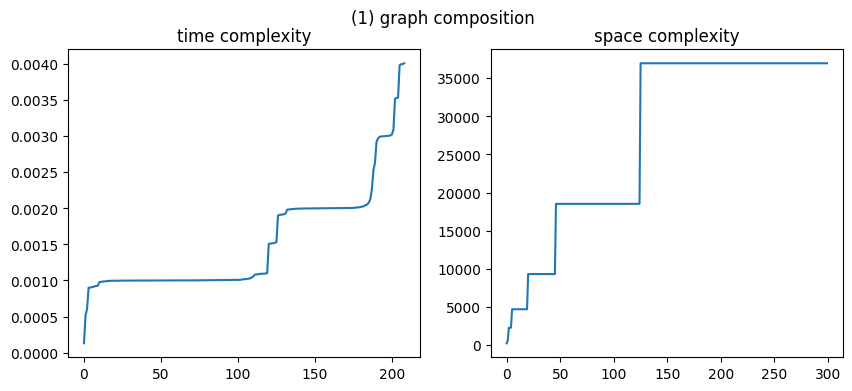

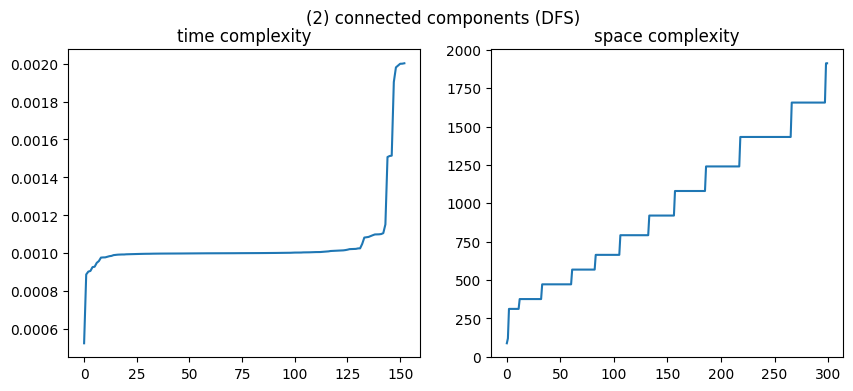

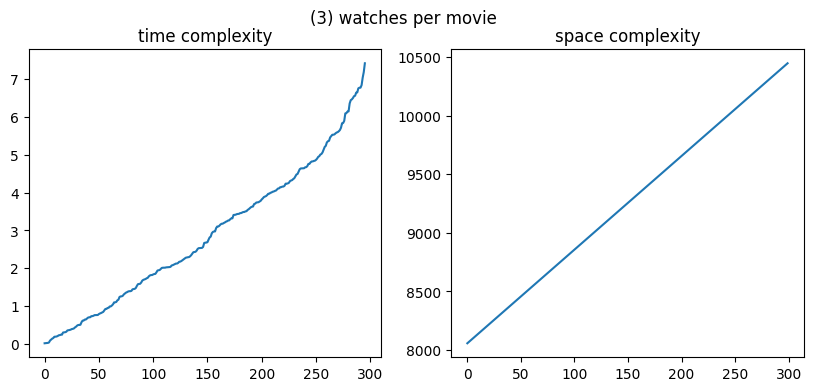

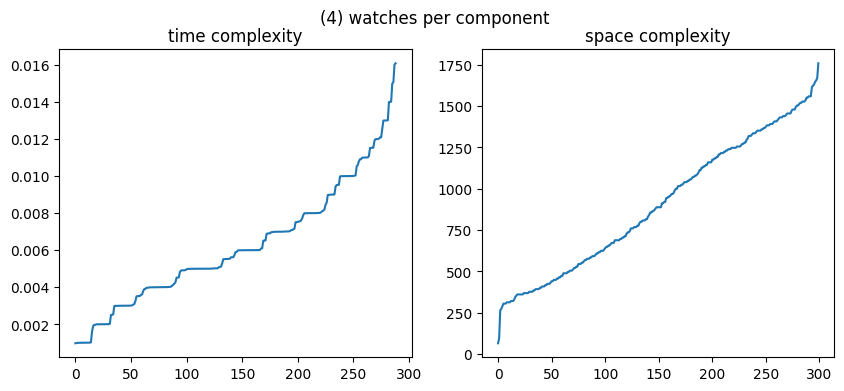

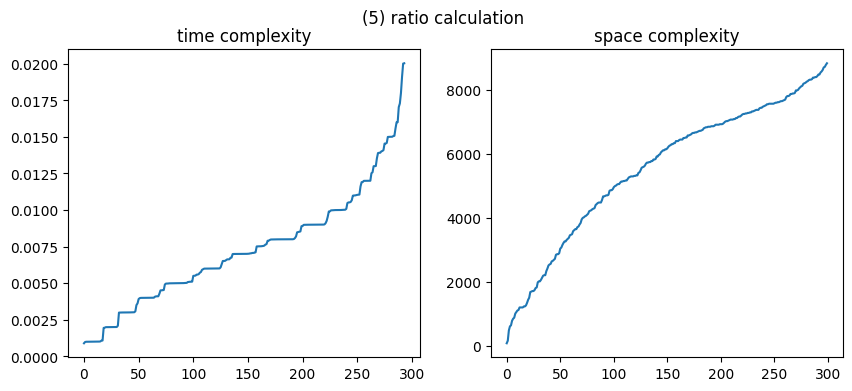

In [410]:
def plot_data(timings, spacings):
    
    title_matrix = [
        '(1) graph composition', 
        '(2) connected components (DFS)', 
        '(3) watches per movie', 
        '(4) watches per component', 
        '(5) ratio calculation'
    ]

    for i in range(5):
        plt.subplots(1, 2, figsize=(10, 4))
        plt.suptitle(title_matrix[i])
        plt.subplot(1, 2, 1)
        plt.plot(timings[i][:-4])
        plt.title('time complexity')
        plt.subplot(1, 2, 2)
        plt.plot(spacings[i])
        plt.title('space complexity')

plot_data(timings, spacings)
